## Assignment of Lecture 04

In this week, we need complete following tasks:
+ Re-review the course online programming; 
+ Choose 1 - 2 books which you interested and keep reading; 
+ Answer the review questions
+ Prepare the basic requirement of our 1st project. 

### Part I Review the online programming. 

[see Lecture04-DaynamicProgramming.ipyn](Lecture04-DaynamicProgramming.ipynb)

### Part1-2: Finish the Solution Parse Part of Edit-Distance
[see Lecture04-DaynamicProgramming.ipyn](Lecture04-DaynamicProgramming.ipynb)

### Part 2 Choose 1 - 2 books to keep reading: 

+ SICP, Structure and Interpretation of Computer Programming. 
+ Introduction to Algorithms 
+ Artificial Intelligence A Modern Approach (3rd Edition) 
+ Code Complete 2 
+ Programming Pearls 
+ **Deep Learning**✅
+ 黑快与画家
+ **数学之美** ✅
+ Fluent Python
+ Hands on Tensorflow
+ Conference: NIPS_ ICML_ ICLR_ ACL_ AAAI

> most books you may find in our github: https://github.com/Computing-Intelligence/References

### Part 3: Answer following questions: 

1. Why do we need dynamic programming? What's the difference of dynamic programming and previous talked `search` problem? 

Ans:动态规划通过将问题分解成子问题，用递归的方式求解子问题的最优解，从而得到原始问题的最优解。使用动态规划能顾帮助我们更加快速的找到问题的最优解，适用于解空间较大的问题。

搜索方法是从原始问题出发自上而下搜索出所有的解，并通过比较找到最优解；动态规划是通过递归的方式自底向上获得问题的最优解；

2. Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the `right` answer based on inputs?

Ans:机器学习方法需要使用数据去拟合目标函数，对数据集的依赖较大，但是一些问题本身可能并没有积累到一定量的原始数据，因此机器学习可能并不是最优的方法； 其次机器学习方法寻找的是问题的近似解，而动态规划求解的是问题的解析解即最优解。

3. Can you catch up at least 3 problems which could solved by Dynamic Programming? 

Ans: 外卖小哥送货路径选择问题；航班路线规划问题；策略类游戏；

4. Can you catch up at least 3 problems wich could sloved by Edit Distance? 

Ans: google搜索时提供的近似索搜索条目；文章/论文查重；编辑器拼写检查；

5. Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature. 

Ans: 
- 寻找重复的子问题：分析问题的求解过程，用公式表示出父问题和子问题的关系；
- 存储子问题的解：计算子问题的解并保存起来，方便父问题使用；
- 解析最优解：第二步存储的解包括所有子问题的解，需要从中提取中最优解的分解过程；

6. What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)

Ans:
- 耗费内存，需要存储大量的中间结果以及使用递归算法本身的内存开销；
- 没有通用的求解方案，每个问题都要具体分析；



## Part 4 Preparation of Project-01

1. Using python Flask or Bottle to finish your first simple web app:
> https://bottlepy.org/

2. Learn what's the SQL, and try some simple SQL operations:
> https://www.w3schools.com/sql/sql_intro.asp

3. Learn what's the HTML ( *ONLY* need to know the basic things)
> https://getbootstrap.com/; https://www.w3schools.com/html/

### (Optinal) Finish the k-person-salesman problem:

In [251]:
import random
import matplotlib.pylab as plt

In [387]:
latitudes = [random.randint(-100, 100) for _ in range(40)]
longitude = [random.randint(-100, 100) for _ in range(40)]

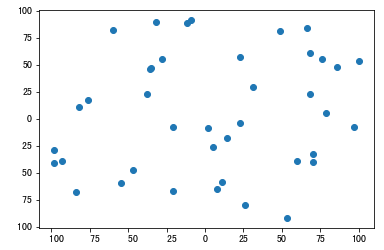

In [388]:
plt.scatter(latitudes, longitude)

给定一个初始点 $P$, 已经 $k$个车辆，如何从该点出发，经这 k 个车辆经过所以的点全部一次，而且所走过的路程最短? 

例如： 

In [389]:
chosen_p = (5, 10)

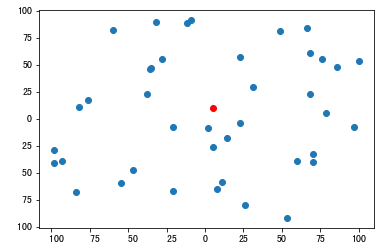

In [390]:
plt.scatter(latitudes, longitude)
plt.scatter([chosen_p[0]], [chosen_p[1]], color='r')

### [1] 寻找重复的子问题
- 寻找起始点到当前所有点中距离最近的一个点，形成一条路线；
- 更新起始点为上一步最近的点，继续寻找当前起始点到剩余列表中的最优路线；

In [391]:
solution = defaultdict(tuple)

In [392]:
from math import sqrt

def distance_of(point1, point2):
    return sqrt(sum(((point1[index] - point2[index])**2 for index in range(len(point1)))))

In [393]:
def get_left_list(orgin_list, to_be_removed):
    return [point for point in orgin_list if point != to_be_removed]

In [394]:
from functools import lru_cache

# TODO
@lru_cache(maxsize=2**10)
def get_path(point_list):
    global solution
    if len(point_list) == 1:
        solution[point_list[0]] = None
        return 0
    
    start = point_list[0]
    
    min_distance, min_point = min(
        [(distance_of(start, point), point) for point in point_list[1:]],
        key=lambda x:x[0])
    
    min_distance += get_path([min_point] + [point for point in point_list[1:] if point != min_point])
    solution[start] = min_point
    
    return min_distance

In [395]:
path_list = [chosen_p] + [(latitudes[index], longitude[index]) for index in range(len(longitude))]

print(path_list)

[(5, 10), (11, -59), (68, 23), (66, 84), (23, 57), (-98, -41), (26, -80), (70, -40), (-28, 55), (60, -39), (-21, -8), (31, 29), (-32, 89), (100, 53), (-84, -68), (-82, 11), (-47, -48), (68, 61), (-9, 91), (97, -8), (86, 48), (23, -4), (-21, -67), (49, 81), (-98, -29), (-38, 23), (-12, 88), (76, 55), (70, -33), (-60, 82), (5, -26), (-55, -60), (-35, 47), (-76, 17), (79, 5), (8, -65), (14, -18), (-93, -39), (2, -9), (53, -92), (-36, 46)]


In [396]:
get_path(path_list)

1040.314764631976

In [397]:
solution

defaultdict(tuple,
            {(-21, -8): None,
             (-60, 82): (-21, -8),
             (-9, 91): (-60, 82),
             (-12, 88): (-9, 91),
             (-32, 89): (-12, 88),
             (-28, 55): (-32, 89),
             (-35, 47): (-28, 55),
             (-36, 46): (-35, 47),
             (-38, 23): (-36, 46),
             (-76, 17): (-38, 23),
             (-82, 11): (-76, 17),
             (-98, -29): (-82, 11),
             (-98, -41): (-98, -29),
             (-93, -39): (-98, -41),
             (-84, -68): (-93, -39),
             (-55, -60): (-84, -68),
             (-47, -48): (-55, -60),
             (-21, -67): (-47, -48),
             (53, -92): (-21, -67),
             (26, -80): (53, -92),
             (8, -65): (26, -80),
             (11, -59): (8, -65),
             (60, -39): (11, -59),
             (70, -40): (60, -39),
             (70, -33): (70, -40),
             (97, -8): (70, -33),
             (79, 5): (97, -8),
             (68, 23): (79, 5),
   